In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv(
    "../data/processed.cleveland.data",
    header=None,
    na_values="?"
)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# add column names found on the website
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "num"
]

df.columns = columns
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## EDA

In [8]:
df.shape

(303, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [12]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Since the proportion of missing values is very small (<2%), we remove those records to avoid introducing bias through imputation.

In [15]:
df = df.dropna().copy()

The target variable was converted into binary format (0 = no disease, 1 = disease).

In [18]:
df.shape

(297, 14)

In [20]:
df["num"].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [22]:
df["num"] = (df["num"] > 0).astype(int)

In [24]:
df["num"].value_counts()

num
0    160
1    137
Name: count, dtype: int64

Check if inconsistent value

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [29]:
for col in ["sex","cp","fbs","restecg","exang","slope","ca","thal"]:
    print(col, df[col].unique())

sex [1. 0.]
cp [1. 4. 3. 2.]
fbs [1. 0.]
restecg [2. 0. 1.]
exang [0. 1.]
slope [3. 2. 1.]
ca [0. 3. 2. 1.]
thal [6. 3. 7.]


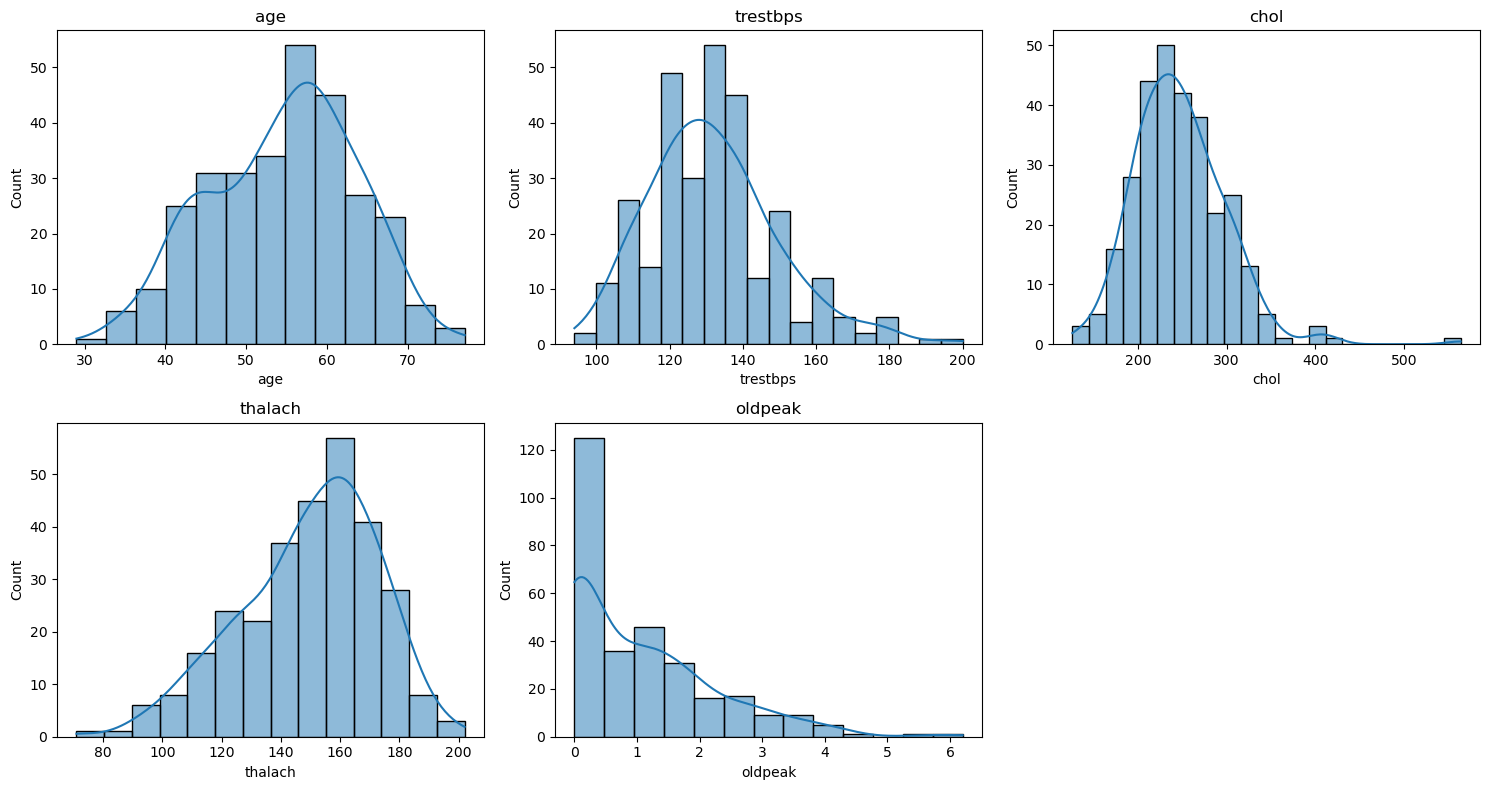

In [31]:
continuous = ["age", "trestbps", "chol", "thalach", "oldpeak"]
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(continuous):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
fig.delaxes(axes[5])
plt.tight_layout()

# save image
os.makedirs("../results", exist_ok=True)
plt.savefig("../results/continuous_distributions.png", dpi=300, bbox_inches="tight")

plt.show()

## Feature Engineering

Continuous Variables:(age, trestbps, chol, thalach, oldpeak)  
Most variables (age, trestbps, and thalach) exhibit approximately symmetric distributions, while cholesterol and oldpeak show mild right skewness. Given that the skewness is not extreme, we apply standardization to all continuous variables without additional log transformation to maintain model simplicity.

Binary Variables: (sex, fbs, exang)  
Since they are already encoded as 0/1 indicators, no further transformation is applied.

Categorical Variables:  (cp, restecg, slope, ca, thal)  
Apply one-hot encoding.

Target Variable:  
The original target variable (num) is converted into a binary outcome  
0 = no heart disease  
1 = presence of heart disease

In [34]:
y = df["num"]
X = df.drop(columns=["num"])

In [37]:
continuous = ["age", "trestbps", "chol", "thalach", "oldpeak"]
binary = ["sex", "fbs", "exang"]
categorical = ["cp", "restecg", "slope", "ca", "thal"]

In [39]:
from sklearn.model_selection import train_test_split
#split data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y #0/1 ratio consists
)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), continuous),
        ("bin", "passthrough", binary),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ]
)

## Model Training

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb_1e9 = Pipeline([
    ("prep", preprocess),
    ("clf", GaussianNB(var_smoothing=1e-9))
])

nb_1e7 = Pipeline([
    ("prep", preprocess),
    ("clf", GaussianNB(var_smoothing=1e-7))
])

nb_1e5 = Pipeline([
    ("prep", preprocess),
    ("clf", GaussianNB(var_smoothing=1e-5))
])

In [46]:
nb_1e9.fit(X_train, y_train)
nb_1e7.fit(X_train, y_train)
nb_1e5.fit(X_train, y_train)
y_pred_1e9 = nb_1e9.predict(X_test)
y_pred_1e7 = nb_1e7.predict(X_test)
y_pred_1e5 = nb_1e5.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print("1e-9:", accuracy_score(y_test, y_pred_1e9))
print("1e-7:", accuracy_score(y_test, y_pred_1e7))
print("1e-5:", accuracy_score(y_test, y_pred_1e5))

1e-9: 0.8666666666666667
1e-7: 0.8666666666666667
1e-5: 0.8666666666666667


In [50]:
from sklearn.metrics import accuracy_score, classification_report

# choose two settings to compare
y_pred_1e9 = nb_1e9.predict(X_test)
y_pred_1e5 = nb_1e5.predict(X_test)

print("GaussianNB var_smoothing=1e-9 Accuracy:", accuracy_score(y_test, y_pred_1e9))
print("GaussianNB var_smoothing=1e-5 Accuracy:", accuracy_score(y_test, y_pred_1e5))

print("\n[1e-9] Classification report:")
print(classification_report(y_test, y_pred_1e9, digits=3))

print("\n[1e-5] Classification report:")
print(classification_report(y_test, y_pred_1e5, digits=3))

GaussianNB var_smoothing=1e-9 Accuracy: 0.8666666666666667
GaussianNB var_smoothing=1e-5 Accuracy: 0.8666666666666667

[1e-9] Classification report:
              precision    recall  f1-score   support

           0      0.833     0.938     0.882        32
           1      0.917     0.786     0.846        28

    accuracy                          0.867        60
   macro avg      0.875     0.862     0.864        60
weighted avg      0.872     0.867     0.865        60


[1e-5] Classification report:
              precision    recall  f1-score   support

           0      0.833     0.938     0.882        32
           1      0.917     0.786     0.846        28

    accuracy                          0.867        60
   macro avg      0.875     0.862     0.864        60
weighted avg      0.872     0.867     0.865        60



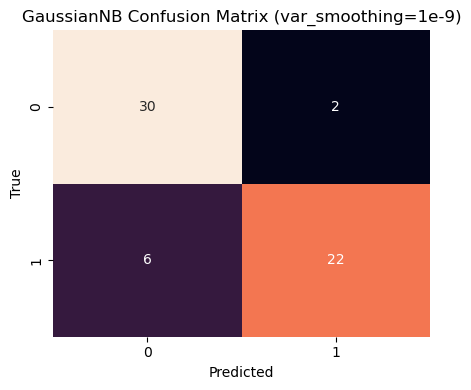

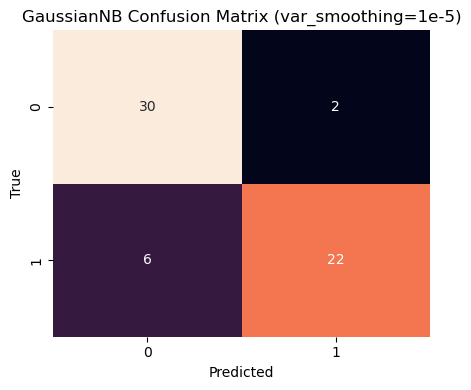

In [52]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

os.makedirs("../results", exist_ok=True)

cm_1e9 = confusion_matrix(y_test, y_pred_1e9)
cm_1e5 = confusion_matrix(y_test, y_pred_1e5)

# Plot 1: var_smoothing = 1e-9
plt.figure(figsize=(4.5, 4))
sns.heatmap(cm_1e9, annot=True, fmt="d", cbar=False)
plt.title("GaussianNB Confusion Matrix (var_smoothing=1e-9)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("../results/cm_gnb_1e-9.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot 2: var_smoothing = 1e-5
plt.figure(figsize=(4.5, 4))
sns.heatmap(cm_1e5, annot=True, fmt="d", cbar=False)
plt.title("GaussianNB Confusion Matrix (var_smoothing=1e-5)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("../results/cm_gnb_1e-5.png", dpi=300, bbox_inches="tight")
plt.show()

AUC (1e-9): 0.9386160714285714
AUC (1e-5): 0.9386160714285714


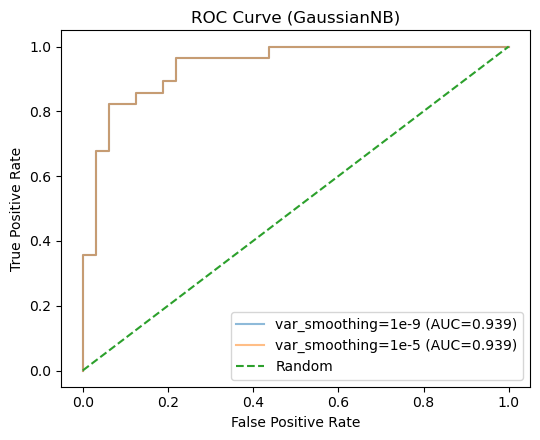

In [53]:
from sklearn.metrics import roc_curve, auc

# probabilities for positive class
y_prob_1e9 = nb_1e9.predict_proba(X_test)[:, 1]
y_prob_1e5 = nb_1e5.predict_proba(X_test)[:, 1]

fpr_1e9, tpr_1e9, _ = roc_curve(y_test, y_prob_1e9)
fpr_1e5, tpr_1e5, _ = roc_curve(y_test, y_prob_1e5)

auc_1e9 = auc(fpr_1e9, tpr_1e9)
auc_1e5 = auc(fpr_1e5, tpr_1e5)

print("AUC (1e-9):", auc_1e9)
print("AUC (1e-5):", auc_1e5)

plt.figure(figsize=(5.5, 4.5))
plt.plot(fpr_1e9, tpr_1e9, label=f"var_smoothing=1e-9 (AUC={auc_1e9:.3f})",alpha=0.5)
plt.plot(fpr_1e5, tpr_1e5, label=f"var_smoothing=1e-5 (AUC={auc_1e5:.3f})",alpha=0.5)
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (GaussianNB)")
plt.legend()
plt.tight_layout()
plt.savefig("../results/roc_gnb.png", dpi=300, bbox_inches="tight")
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

lr_model = Pipeline([
    ("prep", preprocess),
    ("reg", LinearRegression())
])

lr_model.fit(X_train, y_train)

# prediction
y_prob_lr = lr_model.predict(X_test)

# threshold at 0.5
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

In [58]:
#Ridge Regression (L2)
from sklearn.linear_model import Ridge

ridge_1 = Pipeline([
    ("prep", preprocess),
    ("reg", Ridge(alpha=1.0))
])

ridge_10 = Pipeline([
    ("prep", preprocess),
    ("reg", Ridge(alpha=10.0))
])

ridge_1.fit(X_train, y_train)
ridge_10.fit(X_train, y_train)

y_pred_ridge1 = (ridge_1.predict(X_test) >= 0.5).astype(int)
y_pred_ridge10 = (ridge_10.predict(X_test) >= 0.5).astype(int)

In [60]:
#Lasso Regression (L1)
from sklearn.linear_model import Lasso

lasso_001 = Pipeline([
    ("prep", preprocess),
    ("reg", Lasso(alpha=0.01, max_iter=10000))
])

lasso_01 = Pipeline([
    ("prep", preprocess),
    ("reg", Lasso(alpha=0.1, max_iter=10000))
])

lasso_001.fit(X_train, y_train)
lasso_01.fit(X_train, y_train)

y_pred_lasso001 = (lasso_001.predict(X_test) >= 0.5).astype(int)
y_pred_lasso01 = (lasso_01.predict(X_test) >= 0.5).astype(int)

In [62]:
print("Linear:", accuracy_score(y_test, y_pred_lr))
print("Ridge alpha=1:", accuracy_score(y_test, y_pred_ridge1))
print("Ridge alpha=10:", accuracy_score(y_test, y_pred_ridge10))
print("Lasso alpha=0.01:", accuracy_score(y_test, y_pred_lasso001))
print("Lasso alpha=0.1:", accuracy_score(y_test, y_pred_lasso01))

Linear: 0.8166666666666667
Ridge alpha=1: 0.8166666666666667
Ridge alpha=10: 0.8166666666666667
Lasso alpha=0.01: 0.8333333333333334
Lasso alpha=0.1: 0.7833333333333333


In [64]:
from sklearn.metrics import classification_report, accuracy_score

print("Linear")
print(classification_report(y_test, y_pred_lr, digits=3))

print("\nLasso alpha=0.01")
print(classification_report(y_test, y_pred_lasso001, digits=3))

Linear
              precision    recall  f1-score   support

           0      0.784     0.906     0.841        32
           1      0.870     0.714     0.784        28

    accuracy                          0.817        60
   macro avg      0.827     0.810     0.812        60
weighted avg      0.824     0.817     0.814        60


Lasso alpha=0.01
              precision    recall  f1-score   support

           0      0.789     0.938     0.857        32
           1      0.909     0.714     0.800        28

    accuracy                          0.833        60
   macro avg      0.849     0.826     0.829        60
weighted avg      0.845     0.833     0.830        60



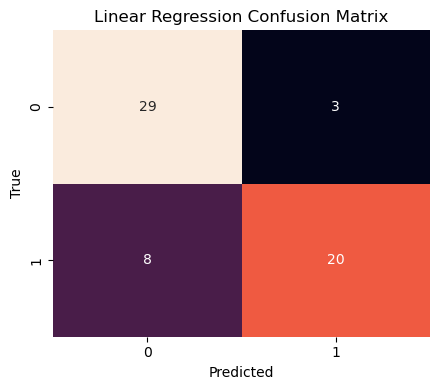

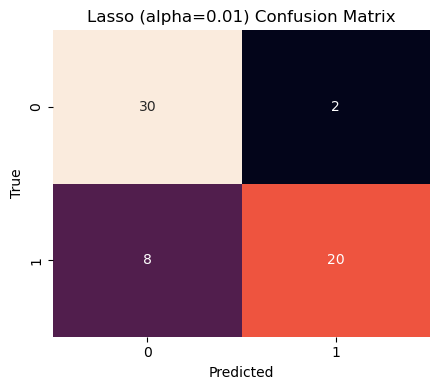

In [66]:
os.makedirs("../results", exist_ok=True)

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_lasso = confusion_matrix(y_test, y_pred_lasso001)

# Linear
plt.figure(figsize=(4.5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cbar=False)
plt.title("Linear Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("../results/cm_linear.png", dpi=300, bbox_inches="tight")
plt.show()

# Lasso
plt.figure(figsize=(4.5,4))
sns.heatmap(cm_lasso, annot=True, fmt="d", cbar=False)
plt.title("Lasso (alpha=0.01) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.savefig("../results/cm_lasso_001.png", dpi=300, bbox_inches="tight")
plt.show()

Linear AUC: 0.9464285714285714
Lasso AUC: 0.9441964285714286


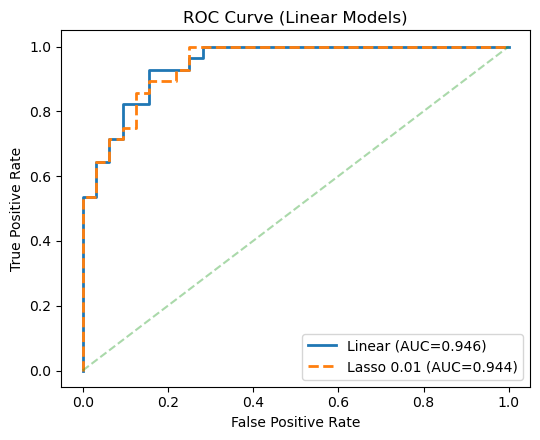

In [68]:
# continuous outputs
y_score_lr = lr_model.predict(X_test)
y_score_lasso = lasso_001.predict(X_test)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_score_lasso)

auc_lr = auc(fpr_lr, tpr_lr)
auc_lasso = auc(fpr_lasso, tpr_lasso)

print("Linear AUC:", auc_lr)
print("Lasso AUC:", auc_lasso)

plt.figure(figsize=(5.5,4.5))
plt.plot(fpr_lr, tpr_lr, label=f"Linear (AUC={auc_lr:.3f})", linewidth=2)
plt.plot(fpr_lasso, tpr_lasso, label=f"Lasso 0.01 (AUC={auc_lasso:.3f})", linewidth=2, linestyle="--")
plt.plot([0,1],[0,1],"--", alpha=0.4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Linear Models)")
plt.legend()
plt.tight_layout()
plt.savefig("../results/roc_linear.png", dpi=300, bbox_inches="tight")
plt.show()